In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential,datasets,optimizers

import numpy as np

print(tf.__version__)

2.0.0


In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 29s 3us/step


In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs=5)

model.evaluate(x_test, y_test, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2945 - accuracy: 0.9144
Epoch 2/5
60000/60000 [==============================] - 3s 50us/sample - loss: 0.1426 - accuracy: 0.9571
Epoch 3/5
60000/60000 [==============================] - 3s 46us/sample - loss: 0.1047 - accuracy: 0.9688
Epoch 4/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0879 - accuracy: 0.9735
Epoch 5/5
60000/60000 [==============================] - 3s 45us/sample - loss: 0.0746 - accuracy: 0.9765
10000/1 - 0s - loss: 0.0402 - accuracy: 0.9779


[0.0760007451292593, 0.9779]

In [11]:
imdb = keras.datasets.imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 28s 2us/step


In [12]:
pip install tensorflow_hub

Note: you may need to restart the kernel to use updated packages.


In [13]:
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))

Training entries: 25000, labels: 25000


In [14]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [15]:
len(train_data[0]), len(train_data[1])

(218, 189)

In [16]:
# 一个映射单词到整数索引的词典
word_index = imdb.get_word_index()

# 保留第一个索引
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

1646592/1641221 [==============================] - 6s 4us/step


In [17]:
decode_review(train_data[0])

"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [18]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [19]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [20]:
print(train_data[0])

[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  104
    4 

In [21]:
# 输入形状是用于电影评论的词汇数目（10,000 词）
vocab_size = 10000

model = keras.Sequential()
model.add(keras.layers.Embedding(vocab_size, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [23]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

In [24]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 2s 110us/sample - loss: 0.6919 - accuracy: 0.5632 - val_loss: 0.6902 - val_accuracy: 0.5862
Epoch 2/40
15000/15000 [==============================] - 1s 60us/sample - loss: 0.6867 - accuracy: 0.7051 - val_loss: 0.6830 - val_accuracy: 0.7090
Epoch 3/40
15000/15000 [==============================] - 1s 56us/sample - loss: 0.6757 - accuracy: 0.7279 - val_loss: 0.6692 - val_accuracy: 0.7481
Epoch 4/40
15000/15000 [==============================] - 1s 56us/sample - loss: 0.6562 - accuracy: 0.7641 - val_loss: 0.6473 - val_accuracy: 0.7567
Epoch 5/40
15000/15000 [==============================] - 1s 56us/sample - loss: 0.6276 - accuracy: 0.7817 - val_loss: 0.6169 - val_accuracy: 0.7746
Epoch 6/40
15000/15000 [==============================] - 1s 57us/sample - loss: 0.5905 - accuracy: 0.8023 - val_loss: 0.5800 - val_accuracy: 0.7964
Epoch 7/40
15000/15000 [==============================]

In [25]:
results = model.evaluate(test_data,  test_labels, verbose=2)

print(results)

25000/1 - 1s - loss: 0.3345 - accuracy: 0.8732
[0.3223268367576599, 0.87324]


In [26]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

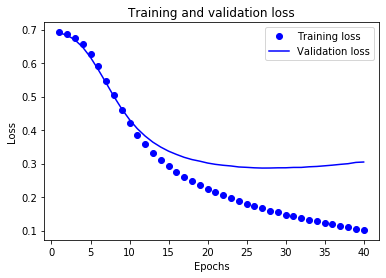

In [28]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# “bo”代表 "蓝点"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b代表“蓝色实线”
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

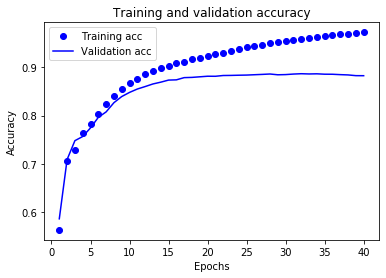

In [29]:
plt.clf()   # 清除数字

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [31]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.0.0


In [32]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

32768/30286 [================================] - 0s 6us/step


'C:\\Users\\User\\.keras\\datasets\\auto-mpg.data'

In [33]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [34]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [35]:
dataset = dataset.dropna()

In [36]:
origin = dataset.pop('Origin')

In [37]:
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [38]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

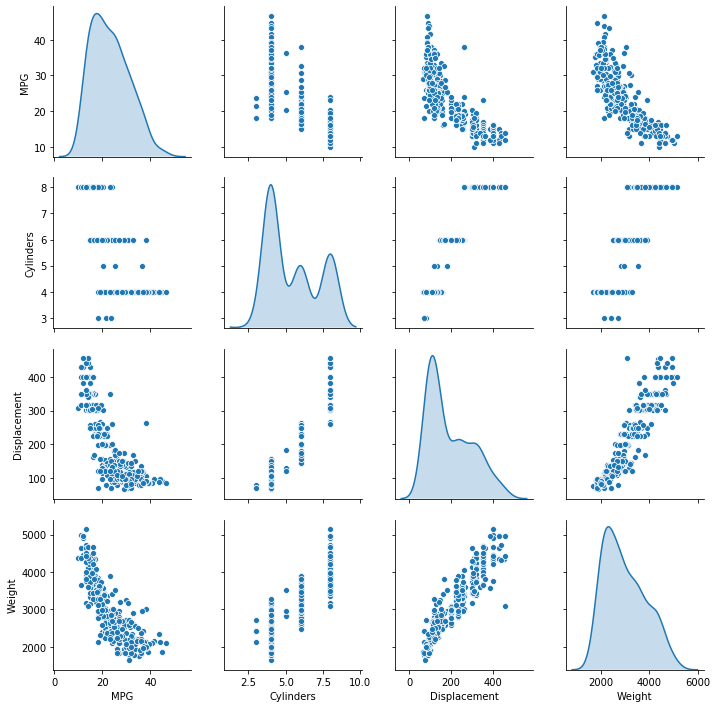

In [39]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [40]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0
USA,314.0,0.624204,0.485101,0.0,0.00,1.0,1.00,1.0
Europe,314.0,0.178344,0.383413,0.0,0.00,0.0,0.00,1.0
Japan,314.0,0.197452,0.398712,0.0,0.00,0.0,0.00,1.0


In [41]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [42]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [43]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [44]:
model = build_model()

In [45]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                640       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


In [46]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-0.22895904],
       [-0.2922855 ],
       [ 0.2739795 ],
       [-0.47351608],
       [-0.02214247],
       [-0.05902039],
       [-0.07071311],
       [ 0.12601177],
       [-0.09551424],
       [ 0.16095127]], dtype=float32)

In [47]:
# 通过为每个完成的时期打印一个点来显示训练进度
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [48]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,2.271992,0.970211,2.271992,9.050254,2.272714,9.050253,995
996,2.081991,0.906041,2.081991,9.055500,2.264568,9.055500,996
997,2.084997,0.915524,2.084997,8.598837,2.201296,8.598837,997
998,1.973165,0.924491,1.973165,10.123121,2.416555,10.123121,998
999,1.989878,0.912392,1.989878,9.313434,2.290966,9.313434,999


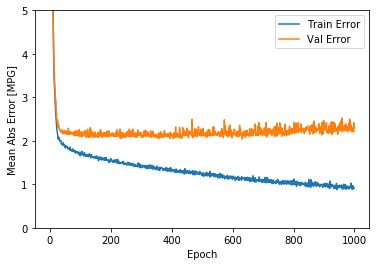

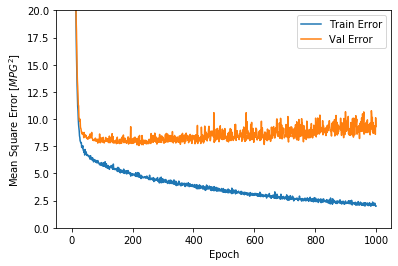

In [49]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [$MPG^2$]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()


plot_history(history)


....................................................

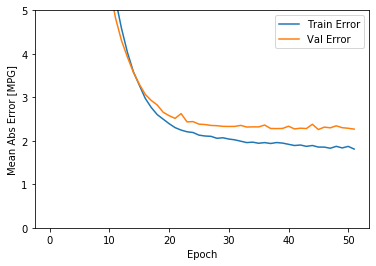

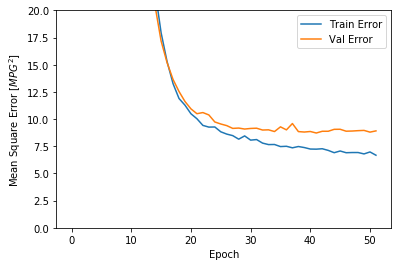

In [50]:
model = build_model()

# patience 值用来检查改进 epochs 的数量
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])

plot_history(history)

In [51]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

78/78 - 0s - loss: 6.0954 - mae: 1.9340 - mse: 6.0954
Testing set Mean Abs Error:  1.93 MPG


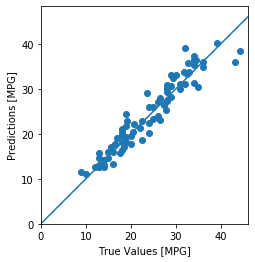

In [52]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

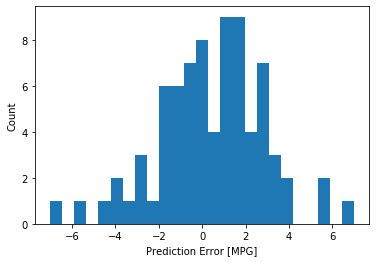

In [53]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

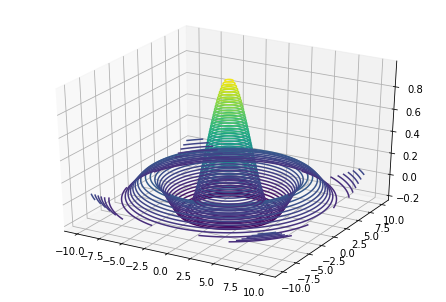

In [61]:
from mpl_toolkits.mplot3d import Axes3D
x = tf.linspace(-10.,10,1000)
y = tf.linspace(-10.,10,1000)
x,y = tf.meshgrid(x,y)
z = tf.sqrt(x**2+y**2)
z = tf.sin(z)/z
fig = plt.figure()
ax = Axes3D(fig)
ax.contour3D(x.numpy(), y.numpy(), z.numpy(), 50)
plt.show()

<tf.Tensor: id=110916, shape=(3,), dtype=float32, numpy=array([1.2, 1. , 3.3], dtype=float32)>

In [68]:
x = tf.random.normal([2,784])
w1 = tf.Variable(tf.random.truncated_normal([784,256], stddev = 0.1))
b1 = tf.Variable(tf.zeros([256]))
o1 = x @ w1 + b1
o1 = tf.nn.relu(o1)
#x,w1,b1,o1

In [69]:
#使用layers.Dense创建全连接层
fc = layers.Dense(512, activation = tf.nn.relu)
h1 = fc(tf.random.normal([4,28*28]))
h1

<tf.Tensor: id=111277, shape=(4, 512), dtype=float32, numpy=
array([[0.43491042, 0.        , 0.        , ..., 0.        , 0.        ,
        1.9899988 ],
       [0.        , 2.0655253 , 0.87109214, ..., 1.9660296 , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.1740921 ],
       [1.712575  , 0.        , 0.        , ..., 0.        , 1.5740734 ,
        0.        ]], dtype=float32)>

In [71]:
#kernel:获取W,bias:获取b
fc.kernel,fc.bias

[<tf.Variable 'dense_12/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[ 0.02452075,  0.05796447,  0.06780888, ...,  0.00558692,
          0.01242486,  0.00885825],
        [ 0.02778337,  0.04752229, -0.0459674 , ..., -0.02090771,
         -0.02561576, -0.04471667],
        [ 0.06430413,  0.00494001,  0.05322402, ...,  0.01715507,
         -0.04868263,  0.06126174],
        ...,
        [ 0.01528703, -0.03404988, -0.06558926, ..., -0.01300492,
          0.03814248, -0.03557802],
        [ 0.01435475, -0.04627386, -0.06789741, ..., -0.00181181,
          0.05699995,  0.06595427],
        [ 0.05485594, -0.0215582 ,  0.04066391, ...,  0.03588047,
         -0.0111463 ,  0.04703793]], dtype=float32)>,
 <tf.Variable 'dense_12/bias:0' shape=(512,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [72]:
#trainable_variables:返回待优化参数表
fc.trainable_variables

[<tf.Variable 'dense_12/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[ 0.02452075,  0.05796447,  0.06780888, ...,  0.00558692,
          0.01242486,  0.00885825],
        [ 0.02778337,  0.04752229, -0.0459674 , ..., -0.02090771,
         -0.02561576, -0.04471667],
        [ 0.06430413,  0.00494001,  0.05322402, ...,  0.01715507,
         -0.04868263,  0.06126174],
        ...,
        [ 0.01528703, -0.03404988, -0.06558926, ..., -0.01300492,
          0.03814248, -0.03557802],
        [ 0.01435475, -0.04627386, -0.06789741, ..., -0.00181181,
          0.05699995,  0.06595427],
        [ 0.05485594, -0.0215582 ,  0.04066391, ...,  0.03588047,
         -0.0111463 ,  0.04703793]], dtype=float32)>,
 <tf.Variable 'dense_12/bias:0' shape=(512,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [73]:
#variables:返回所有参数列表
fc.variables

[<tf.Variable 'dense_12/kernel:0' shape=(784, 512) dtype=float32, numpy=
 array([[ 0.02452075,  0.05796447,  0.06780888, ...,  0.00558692,
          0.01242486,  0.00885825],
        [ 0.02778337,  0.04752229, -0.0459674 , ..., -0.02090771,
         -0.02561576, -0.04471667],
        [ 0.06430413,  0.00494001,  0.05322402, ...,  0.01715507,
         -0.04868263,  0.06126174],
        ...,
        [ 0.01528703, -0.03404988, -0.06558926, ..., -0.01300492,
          0.03814248, -0.03557802],
        [ 0.01435475, -0.04627386, -0.06789741, ..., -0.00181181,
          0.05699995,  0.06595427],
        [ 0.05485594, -0.0215582 ,  0.04066391, ...,  0.03588047,
         -0.0111463 ,  0.04703793]], dtype=float32)>,
 <tf.Variable 'dense_12/bias:0' shape=(512,) dtype=float32, numpy=
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [84]:
    '''
    张量方式实现神经网络
    '''
x = tf.random.normal([4,784])
#隐藏层1
w1 = tf.Variable(tf.random.truncated_normal([784, 256], stddev = 0.1))
b1 = tf.Variable(tf.zeros([256]))
#隐藏层2
w2 = tf.Variable(tf.random.truncated_normal([256, 128], stddev = 0.1))
b2 = tf.Variable(tf.zeros([128]))
#隐藏层3
w3 = tf.Variable(tf.random.truncated_normal([128, 64], stddev = 0.1))
b3 = tf.Variable(tf.zeros([64]))
#输出层
w4 = tf.Variable(tf.random.truncated_normal([64, 10], stddev = 0.1))
b4 = tf.Variable(tf.zeros([10]))

with tf.GradientTape() as tape:    #梯度记录器
    #前向传播
     h1 = x @ w1 + tf.broadcast_to(b1, [x.shape[0], 256])
    h1 = tf.nn.relu(h1)

    h2 = h1 @ w2 + b2
    h2 = tf.nn.relu(h2)

    h3 = h2 @ w3 + b3
    h3 = tf.nn.relu(h3)

    h4 = h3 @ w4 +b4


In [94]:
    '''
    层方式实现神经网络
    '''
#通过keras.Sequential容器封装一个网络
x = tf.random.normal([4,256])
model = Sequential([
    layers.Dense(256, activation = tf.nn.relu), #隐藏层1
    layers.Dense(128, activation = tf.nn.relu), #隐藏层2
    layers.Dense(64, activation = tf.nn.relu), #隐藏层3
    layers.Dense(10, activation = None) #输出层
])

out = model(x)
out
'''
optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae', 'mse'])
'''

"\noptimizer = tf.keras.optimizers.RMSprop(0.001)\n\nmodel.compile(loss='mse',\n          optimizer=optimizer,\n          metrics=['mae', 'mse'])\n"

In [90]:
# 导入 Sequential 容器
from tensorflow.keras import layers, Sequential
network = Sequential([ # 封装为一个网络
layers.Dense(3, activation=None), # 全连接层
layers.ReLU(),#激活函数层
layers.Dense(2, activation=None), # 全连接层
layers.ReLU() #激活函数层
])
x = tf.random.normal([4,3])
network(x) # 输入从第一层开始， 逐层传播至最末层

<tf.Tensor: id=111898, shape=(4, 2), dtype=float32, numpy=
array([[0.        , 0.        ],
       [0.        , 0.14753388],
       [0.        , 0.        ],
       [0.        , 0.        ]], dtype=float32)>

In [95]:
network = Sequential([layers.Dense(256, activation='relu'),
layers.Dense(128, activation='relu'),
layers.Dense(64, activation='relu'),
layers.Dense(32, activation='relu'),
layers.Dense(10)])
network.build(input_shape=(None, 28*28))
network.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_35 (Dense)             multiple                  200960    
_________________________________________________________________
dense_36 (Dense)             multiple                  32896     
_________________________________________________________________
dense_37 (Dense)             multiple                  8256      
_________________________________________________________________
dense_38 (Dense)             multiple                  2080      
_________________________________________________________________
dense_39 (Dense)             multiple                  330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________


In [96]:
# 导入优化器，损失函数模块
from tensorflow.keras import optimizers,losses
# 采用 Adam 优化器，学习率为 0.01;采用交叉熵损失函数，包含 Softmax
network.compile(optimizer=optimizers.Adam(lr=0.01),
loss=losses.CategoricalCrossentropy(from_logits=True),
metrics=['accuracy'] # 设置测量指标为准确率
)

In [104]:
# 指定训练集为 train_db，验证集为 val_db,训练 5 个 epochs，每 2 个 epoch 验证一次
# 返回训练信息保存在 history 中
history = network.fit(train_db, epochs=5, validation_data=val_db,
validation_freq=2)

NameError: name 'train_db' is not defined

In [103]:
# 加载 ImageNet 预训练网络模型，并去掉最后一层
resnet = keras.applications.ResNet50(weights='imagenet',include_top=False)
#resnet.summary()
# 测试网络的输出
x = tf.random.normal([4,224,224,3])
out = resnet(x)
out.shape

TensorShape([4, 7, 7, 2048])

In [105]:
global_average_layer = layers.GlobalAveragePooling2D()
x = tf.random.normal([4,7,7,2048])
out = global_average_layer(x)
out.shape

TensorShape([4, 2048])

In [106]:
fc = layers.Dense(100)
x = tf.random.normal([4,2048])
out = fc(x)
out.shape

TensorShape([4, 100])

In [113]:
mynet = Sequential([resnet, global_average_layer, fc])
mynet.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, None, None, 2048)  23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense_40 (Dense)             (None, 100)               204900    
Total params: 23,792,612
Trainable params: 23,739,492
Non-trainable params: 53,120
_________________________________________________________________


In [6]:
def preprocess(x, y):
    # [0~1]
    x = 2*tf.cast(x, dtype=tf.float32) / 255.-1
    y = tf.cast(y, dtype=tf.int32)
    return x,y

In [7]:
# 在线下载，加载 CIFAR10 数据集
(x,y), (x_test, y_test) = datasets.cifar100.load_data()
# 删除 y 的一个维度， [b,1] => [b]
y = tf.squeeze(y, axis=1)
y_test = tf.squeeze(y_test, axis=1)
# 打印训练集和测试集的形状
print(x.shape, y.shape, x_test.shape, y_test.shape)
# 构建训练集对象
train_db = tf.data.Dataset.from_tensor_slices((x,y))
train_db = train_db.shuffle(1000).map(preprocess).batch(128)
# 构建测试集对象
test_db = tf.data.Dataset.from_tensor_slices((x_test,y_test))
test_db = test_db.map(preprocess).batch(128)
# 从训练集中采样一个 Batch， 并观察
sample = next(iter(train_db))
print('sample:', sample[0].shape, sample[1].shape,
    tf.reduce_min(sample[0]), tf.reduce_max(sample[0]))

(50000, 32, 32, 3) (50000,) (10000, 32, 32, 3) (10000,)
sample: (128, 32, 32, 3) (128,) tf.Tensor(-1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


In [10]:
conv_layers = [ # 先创建包含多层的列表
# Conv-Conv-Pooling 单元 1
# 64 个 3x3 卷积核, 输入输出同大小
layers.Conv2D(64, kernel_size=[3, 3], padding="same", activation=tf.nn.relu),
layers.Conv2D(64, kernel_size=[3, 3], padding="same", activation=tf.nn.relu),
# 高宽减半
layers.MaxPool2D(pool_size=[2, 2], strides=2, padding='same'),
# Conv-Conv-Pooling 单元 2,输出通道提升至 128，高宽大小减半
layers.Conv2D(128, kernel_size=[3, 3], padding="same", activation=tf.nn.relu),
layers.Conv2D(128, kernel_size=[3, 3], padding="same", activation=tf.nn.relu),
layers.MaxPool2D(pool_size=[2, 2], strides=2, padding='same'),
# Conv-Conv-Pooling 单元 3,输出通道提升至 256，高宽大小减半
layers.Conv2D(256, kernel_size=[3, 3], padding="same", activation=tf.nn.relu),
layers.Conv2D(256, kernel_size=[3, 3], padding="same", activation=tf.nn.relu),
layers.MaxPool2D(pool_size=[2, 2], strides=2, padding='same'),
# Conv-Conv-Pooling 单元 4,输出通道提升至 512，高宽大小减半
layers.Conv2D(512, kernel_size=[3, 3], padding="same", activation=tf.nn.relu),
layers.Conv2D(512, kernel_size=[3, 3], padding="same", activation=tf.nn.relu),
layers.MaxPool2D(pool_size=[2, 2], strides=2, padding='same'),
# Conv-Conv-Pooling 单元 5,输出通道提升至 512，高宽大小减半
layers.Conv2D(512, kernel_size=[3, 3], padding="same", activation=tf.nn.relu),
layers.Conv2D(512, kernel_size=[3, 3], padding="same", activation=tf.nn.relu),
layers.MaxPool2D(pool_size=[2, 2], strides=2, padding='same')
]
# 利用前面创建的层列表构建网络容器
conv_net = Sequential(conv_layers)

In [15]:
# 创建 3 层全连接层子网络
fc_net = Sequential([
layers.Dense(256, activation=tf.nn.relu),
layers.Dense(128, activation=tf.nn.relu),
layers.Dense(10, activation=None),
])
# build2 个子网络，并打印网络参数信息
conv_net.build(input_shape=[4, 32, 32, 3])
fc_net.build(input_shape=[4, 512])
conv_net.summary()
fc_net.summary()
optimizer = optimizers.Adam(lr=1e-4)

# [1, 2] + [3, 4] => [1, 2, 3, 4]
variables = conv_net.trainable_variables + fc_net.trainable_variables

for epoch in range(50):

    for step, (x,y) in enumerate(train_db):

        with tf.GradientTape() as tape:
            # [b, 32, 32, 3] => [b, 1, 1, 512]
            out = conv_net(x)
            # flatten, => [b, 512]
            out = tf.reshape(out, [-1, 512])
            # [b, 512] => [b, 10]
            logits = fc_net(out)
            # [b] => [b, 10]
            y_onehot = tf.one_hot(y, depth=10)
            # compute loss
            loss = tf.losses.categorical_crossentropy(y_onehot, logits, from_logits=True)
            loss = tf.reduce_mean(loss)

        grads = tape.gradient(loss, variables)
        optimizer.apply_gradients(zip(grads, variables))

        if step %100 == 0:
            print(epoch, step, 'loss:', float(loss))



    total_num = 0
    total_correct = 0
    for x,y in test_db:

        out = conv_net(x)
        out = tf.reshape(out, [-1, 512])
        logits = fc_net(out)
        prob = tf.nn.softmax(logits, axis=1)
        pred = tf.argmax(prob, axis=1)
        pred = tf.cast(pred, dtype=tf.int32)

        correct = tf.cast(tf.equal(pred, y), dtype=tf.int32)
        correct = tf.reduce_sum(correct)

        total_num += x.shape[0]
        total_correct += int(correct)

    acc = total_correct / total_num
    print(epoch, 'acc:', acc)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           multiple                  1792      
_________________________________________________________________
conv2d_11 (Conv2D)           multiple                  36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_12 (Conv2D)           multiple                  73856     
_________________________________________________________________
conv2d_13 (Conv2D)           multiple                  147584    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 multiple                  0         
_________________________________________________________________
conv2d_14 (Conv2D)           multiple                 

KeyboardInterrupt: 

In [1]:
from collections import deque
import random
import gym
import numpy as np
from tensorflow.keras import models, layers, optimizers
import matplotlib.pyplot as plt


class DQN(object):
    def __init__(self):
        self.step = 0
        self.update_freq = 200 # 模型更新频率
        self.replay_size = 2000 # 训练集大小
        self.replay_queue = deque(maxlen = self.replay_size)
        self.model = self.create_model()
        self.target_model = self.create_model()


    def create_model(self):
        """
        创建一个隐藏层为100个神经网络
        """
        STATE_DIM, ACTION_DIM = 2, 3
        model = models.Sequential([
            layers.Dense(100,input_dim = STATE_DIM, activation='relu'),
            layers.Dense(ACTION_DIM, activation='linear')
        ])
        model.compile(loss='mean_squared_error',
                      optimizer=optimizers.Adam(0.001))
        return model

    def act(self, s, epsilon=0.1):
        """
        预测动作
        """
        # 刚开始时，加一点随机成分，产生更多的状态
        if np.random.uniform() < epsilon - self.step *0.0002:
            return np.random.choice([0, 1, 2])
        return np.argmax(self.model.predict(np.array([s]))[0])

    def save_model(self, file_path='MountainCar-v0-dqn.h5'):
        print('model saved')
        self.model.save(file_path)

    def remember(self, s, a, next_s, reward):
        """
        历史记录，postion >= 0.4时给额外的reward，快速收敛
        """
        if next_s[0] >= 0.4:
            reward += 1
        self.replay_queue.append((s, a, next_s, reward))

    def train(self, batch_size=64, lr=1, factor=0.95):
        if len(self.replay_queue) < self.replay_size:
            return
        # 每update_freq步，将model的权重赋值给target_model
        if self.step % self.update_freq ==0:
            self.target_model.set_weights(self.model.get_weights())

        replay_batch = random.sample(self.replay_queue, batch_size)
        s_batch = np.array([replay[0] for replay in replay_batch])
        next_s_batch = np.array([replay[2] for replay in replay_batch])

        Q = self.model.predict(s_batch)
        Q_next = self.target_model.predict(next_s_batch)

        # 使用公式更新训练集中的Q值
        for i, replay in enumerate(replay_batch):
            _, a, _, reward = replay
            Q[i][a] = (1 - lr)*Q[i][a] + lr * (reward + factor * np.amax(Q_next[i]))

        # 传入网络进行训练
        self.model.fit(s_batch, Q, verbose = 0)

if __name__ == "__main__":
    env = gym.make("MountainCar-v0")
    episodes = 1000 # 训练1000次
    score_list = [] # 记录所有分数
    agent = DQN()
    for i in range(episodes):
        s = env.reset()
        score = 0
        while True:
            env.render()
            a = agent.act(s)
            next_s, reward, done, _ = env.step(a)
            agent.remember(s, a, next_s, reward)
            agent.train()
            score += reward
            s = next_s
            if done:
                #score_list.append(score)
                #print('episode: ', i, ' score: ', score, ' max: ', max(score_list))
                print('episode: ', i, ' score: ', score)
                break
        '''     
        # 最后10次的平均分大于-160时，停止并保存模型
        if np.mean(score_list[-10:]) > -160:
            agent.save_model()
            break
        '''
    env.close()
'''
    plt.plot(score_list, color='green')
    plt.show()
'''

ModuleNotFoundError: No module named 'gym'

In [2]:
pip install gym

Note: you may need to restart the kernel to use updated packages.


  ERROR: Could not find a version that satisfies the requirement pyglet<=1.3.2,>=1.2.0 (from gym) (from versions: none)
ERROR: No matching distribution found for pyglet<=1.3.2,>=1.2.0 (from gym)


In [7]:
x = tf.constant(3.0)
with tf.GradientTape() as g:
  g.watch(x) # x不是带可训练标签的张量，需要watch
  y = x * x
dy_dx = g.gradient(y, x) # Will compute to 6.0
print(dy_dx)

tf.Tensor(6.0, shape=(), dtype=float32)


In [8]:
x = tf.Variable(3.0)
with tf.GradientTape() as g:
 # g.watch(x) # x是带可训练标签的张量,不需要watch
  y = x * x
dy_dx = g.gradient(y, x) # Will compute to 6.0
print(dy_dx)

tf.Tensor(6.0, shape=(), dtype=float32)
